In [1]:
import nltk
import konlpy
import matplotlib.pyplot as plt

C:\Users\JINHYO\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\JINHYO\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\JINHYO\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\JINHYO\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\JINHYO\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expect

In [2]:
from nltk.corpus import gutenberg, brown

In [7]:
len(gutenberg.fileids())

18

In [6]:
len(brown.fileids())

500

In [9]:
from nltk.tokenize import word_tokenize
from nltk.text import Text

## gutenberg + heaps' law

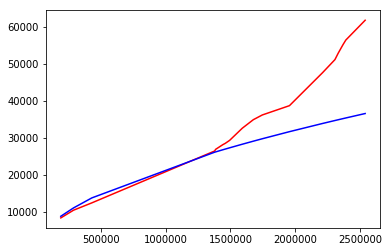

In [26]:
k = 11 # 10~100
b = 0.55 # 0.4~0.6

eachTotal = []
eachUnique = set()

x = []
unique = []
heaps = []

for _ in gutenberg.fileids():
    _text = Text(word_tokenize(gutenberg.open(_).read()))
    
    eachTotal.append(_text.vocab().N()) # 각 corpus의 token 갯수를 수집한다.
    eachUnique = eachUnique | set(_text.vocab().keys()) 
                # 합집합을 이용해서 새로 추가되는 unique 단어에 중복을 제거한다.
    
    x.append(sum(eachTotal)) # 현재까지 열어본 corpus의 총 token 갯수를 sum으로 구한다.
    unique.append(len(eachUnique)) # 현재까지 열어본 corpus의 총 unique 단어 갯수.
    heaps.append(k*x[-1]**b) # 현재 까지 열어본 corpus를 바탕으로 heaps 법칙 적용.
    
plt.plot(x, unique, "r-")
plt.plot(x, heaps, "b-")

> gutenberg의 corpus 갯수가 18개이다.
>
> heaps' law를 적용하기에는 corpus 갯수가 충분히 많지 않아서 일치하지 않는 것 같다.
>
> corpus가 충분히 많으면 heaps' law가 일치할 것이다.

---

## brown + heaps' law
    - brown은 corpus가 500개

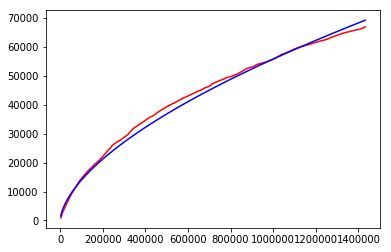

In [22]:
k = 14 # 10~100
b = 0.6 # 0.4~0.6

eachTotal = []
eachUnique = set()

x = []
unique = []
heaps = []

for _ in brown.fileids():
    _text = Text(word_tokenize(brown.open(_).read()))
    
    eachTotal.append(_text.vocab().N())
    eachUnique = eachUnique | set(_text.vocab().keys())
    
    x.append(sum(eachTotal))
    unique.append(len(eachUnique))
    heaps.append(k*x[-1]**b)
    
plt.plot(x, unique, "r-")
plt.plot(x, heaps, "b-")

> corpus가 500개로 충분히 많아서, gutenberg보다 잘 일치한다.

#### 양변에 log를 취한다.

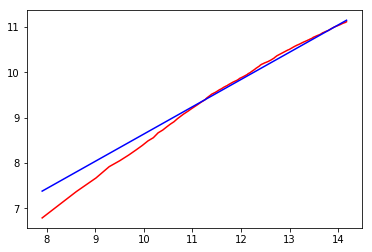

In [32]:
from math import log

x_ = [log(_) for _ in x]
unique_ = [log(_) for _ in unique]
heaps_ = [log(_) for _ in heaps]
    
plt.plot(x_, unique_, "r-")
plt.plot(x_, heaps_, "b-")

> 양변에 log를 취하면 선형 그래프로 비교할 수 있다.

---

## kobill + heaps' law

In [50]:
from konlpy.corpus import kobill
from konlpy.tag import Kkma

In [36]:
len(kobill.fileids())

10

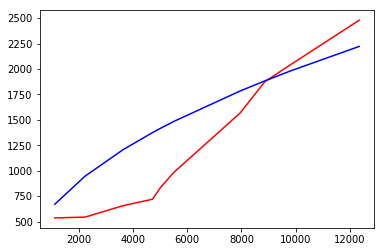

In [54]:
k = 20 # 10~100
b = 0.5 # 0.4~0.6

eachTotal = []
eachUnique = set()

x = []
unique = []
heaps = []

for _ in kobill.fileids():
    _text = Text(word_tokenize(kobill.open(_).read()))
    
    eachTotal.append(_text.vocab().N())
    eachUnique = eachUnique | set(_text.vocab().keys())
    
    x.append(sum(eachTotal))
    unique.append(len(eachUnique))
    heaps.append(k*x[-1]**b)
    
plt.plot(x, unique, "r-")
plt.plot(x, heaps, "b-")

> kobill 또한 corpus가 10개이기 때문에, 충분히 크지 않아서 일치하지 않는 것으로 보인다.

## 크로울링 뉴스기사 + heaps' law

In [55]:
import os

In [61]:
politics = [_ for _ in os.listdir("practice/8일차_실습_project/헤드라인")
            if _.startswith("정치-")]

In [93]:
len(politics)

30

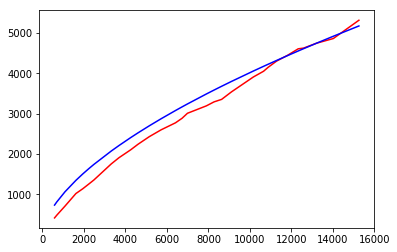

In [92]:
k = 16
b = 0.6

eachTotal = []
eachUnique = set()

x = []
unique = []
heaps = []

for _ in politics:
    with open("practice/8일차_실습_project/헤드라인/"+_,
              "r", encoding="utf-8") as fp:
        article = fp.read()
    _text = Text(word_tokenize(article))
    
    eachTotal.append(_text.vocab().N())
    eachUnique = eachUnique | set(_text.vocab().keys())
    
    x.append(sum(eachTotal))
    unique.append(len(eachUnique))
    heaps.append(k*x[-1]**b)
    
plt.plot(x, unique, "r-")
plt.plot(x, heaps, "b-")

> crawling 기사 갯수는 총 30개로, kobill보다는 많아서 heaps' lawrk 보다 잘 적용된 것으로 보인다.
>
> 기사 갯수가 늘어날수록, 더 잘 일치할 것이다.